In [1]:
from sortedcontainers import SortedDict
from collections import namedtuple
from queue import PriorityQueue

# Define the data structures
EventPoint = namedtuple('EventPoint', ['x', 'y', 'segment'])
Segment = namedtuple('Segment', ['p1', 'p2'])

class SweepLineStatus:
    def __init__(self):
        self.status = SortedDict()

    def insert(self, segment):
        self.status[segment] = segment

    def remove(self, segment):
        del self.status[segment]

    def above(self, segment):
        idx = self.status.bisect_right(segment)
        if idx == len(self.status):
            return None
        return self.status.peekitem(idx)[1]

    def below(self, segment):
        idx = self.status.bisect_left(segment)
        if idx == 0:
            return None
        return self.status.peekitem(idx - 1)[1]

class EventQueue:
    def __init__(self):
        self.queue = PriorityQueue()

    def insert(self, point):
        self.queue.put(point)

    def pop(self):
        return self.queue.get()

    def empty(self):
        return self.queue.empty()


In [5]:
import collections

# Define the data structures
EventPoint = collections.namedtuple('EventPoint', ['x', 'y', 'segment'])
Segment = collections.namedtuple('Segment', ['p1', 'p2'])

class SweepLineStatus:
    def __init__(self):
        self.status = []

    def insert(self, segment):
        self.status.append(segment)
        self.status.sort(key=lambda s: s.p1[1])

    def remove(self, segment):
        self.status.remove(segment)

    def above(self, segment):
        idx = self.status.index(segment)
        if idx == len(self.status) - 1:
            return None
        return self.status[idx + 1]

    def below(self, segment):
        idx = self.status.index(segment)
        if idx == 0:
            return None
        return self.status[idx - 1]

class EventQueue:
    def __init__(self):
        self.queue = []

    def insert(self, point):
        self.queue.append(point)
        self.queue.sort(key=lambda p: p.x, reverse=True)

    def pop(self):
        return self.queue.pop()

    def empty(self):
        return len(self.queue) == 0


In [6]:
def cross_product(p1, p2):
    return p1[0] * p2[1] - p2[0] * p1[1]

def direction(p1, p2, p3):
    return cross_product((p3[0]-p1[0], p3[1]-p1[1]), (p2[0]-p1[0], p2[1]-p1[1]))

def on_segment(p1, p2, p3):
    return min(p1[0], p2[0]) <= p3[0] <= max(p1[0], p2[0]) and min(p1[1], p2[1]) <= p3[1] <= max(p1[1], p2[1])

def intersect(s1, s2):
    d1 = direction(s2.p1, s2.p2, s1.p1)
    d2 = direction(s2.p1, s2.p2, s1.p2)
    d3 = direction(s1.p1, s1.p2, s2.p1)
    d4 = direction(s1.p1, s1.p2, s2.p2)

    if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
        return True
    elif d1 == 0 and on_segment(s2.p1, s2.p2, s1.p1):
        return True
    elif d2 == 0 and on_segment(s2.p1, s2.p2, s1.p2):
        return True
    elif d3 == 0 and on_segment(s1.p1, s1.p2, s2.p1):
        return True
    elif d4 == 0 and on_segment(s1.p1, s1.p2, s2.p2):
        return True
    return False

def bentley_ottmann(segments):
    # Initialize the event queue with the start and end points of each segment
    event_queue = EventQueue()
    for segment in segments:
        event_queue.insert(EventPoint(segment.p1[0], segment.p1[1], segment))
        event_queue.insert(EventPoint(segment.p2[0], segment.p2[1], segment))

    # Initialize the sweep line status
    sweep_line_status = SweepLineStatus()

    # Process the events
    while not event_queue.empty():
        event_point = event_queue.pop()

        if event_point.segment.p1[0] == event_point.x:
            # This is the start of a segment
            sweep_line_status.insert(event_point.segment)

            above = sweep_line_status.above(event_point.segment)
            below = sweep_line_status.below(event_point.segment)

            if above and intersect(event_point.segment, above):
                return True
            if below and intersect(event_point.segment, below):
                return True
        else:
            # This is the end of a segment
            above = sweep_line_status.above(event_point.segment)
            below = sweep_line_status.below(event_point.segment)

            if above and below and intersect(above, below):
                return True

            sweep_line_status.remove(event_point.segment)

    return False


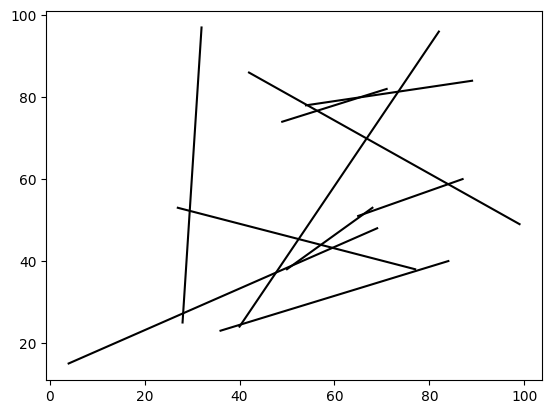

ValueError: Segment(p1=(69, 48), p2=(4, 15)) is not in list

In [15]:
import matplotlib.pyplot as plt
import random

def generate_segments(n):
    segments = []
    for _ in range(n):
        x1 = random.randint(0, 100)
        y1 = random.randint(0, 100)
        x2 = random.randint(0, 100)
        y2 = random.randint(0, 100)
        segments.append(Segment((x1, y1), (x2, y2)))
    return segments

def plot_segments(segments):
    for segment in segments:
        plt.plot([segment.p1[0], segment.p2[0]], [segment.p1[1], segment.p2[1]], 'k-')
    plt.show()

segments = generate_segments(10)
plot_segments(segments)

bentley_ottmann(segments)